Datasets can be downloaded from [here](https://www.dropbox.com/sh/yqlclftyolwqy7y/AADVD-_IOqpXQx8PlWcywMypa?dl=0)  
**Datasets have been normalized.**

Ref: Olsson, A. et al. Single-cell analysis of mixed-lineage states leading to a binary cell fate choice. Nature (2016).

In [2]:
import stream as st
st.__version__

'1.0'

In [3]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

In [4]:
adata=st.read(file_name='./data_olsson2016.tsv.gz',delimiter='\t',workdir='./stream_result')

Saving results in: ./stream_result


In [5]:
adata

AnnData object with n_obs × n_vars = 382 × 23955
    uns: 'workdir'

In [6]:
st.add_cell_labels(adata,file_name='./cell_label.tsv.gz')
st.add_cell_colors(adata,file_name='./cell_label_color.tsv.gz')

In [7]:
st.filter_cells(adata,min_n_features= 100,assay='rna')
st.filter_features(adata,min_n_cells = 5,assay='rna')

filter cells based on min_n_features
after filtering out low-quality cells: 
382 cells, 23955 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
382 cells, 12445 genes


500 variable genes are selected


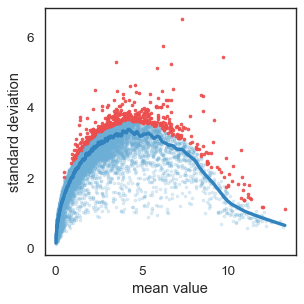

In [8]:
st.select_variable_genes(adata,loess_frac=0.01, n_genes=500)

In [9]:
st.dimension_reduction(adata,method='mlle',feature='var_genes',n_components=4,n_neighbors=50,n_jobs=4)

feature var_genes is being used ...
4 cpus are being used ...


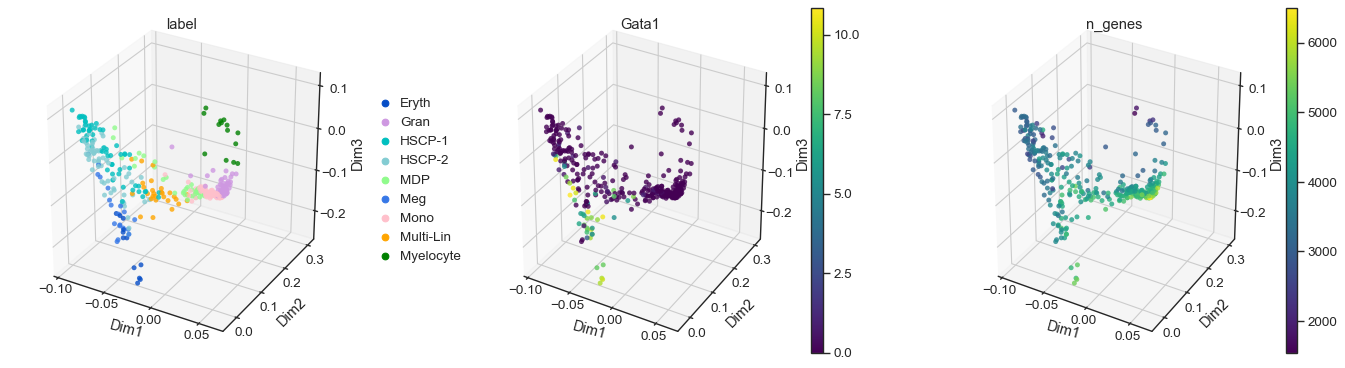

In [10]:
st.plot_dimension_reduction(adata,color=['label','Gata1','n_genes'],n_components=3,show_graph=False,show_text=False)

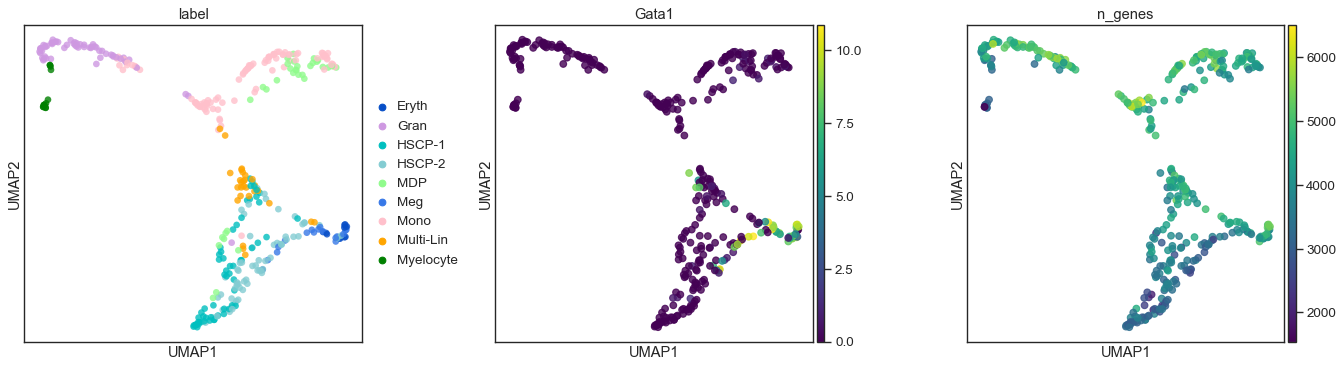

In [11]:
st.plot_visualization_2D(adata,n_neighbors=50,method='umap',color=['label','Gata1','n_genes'],use_precomputed=False)

****By setting `use_vis=True`, we choose the embedding of cells from `plot_visualization_2D()` as the manifold where STREAM learns principal graph****



Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 5


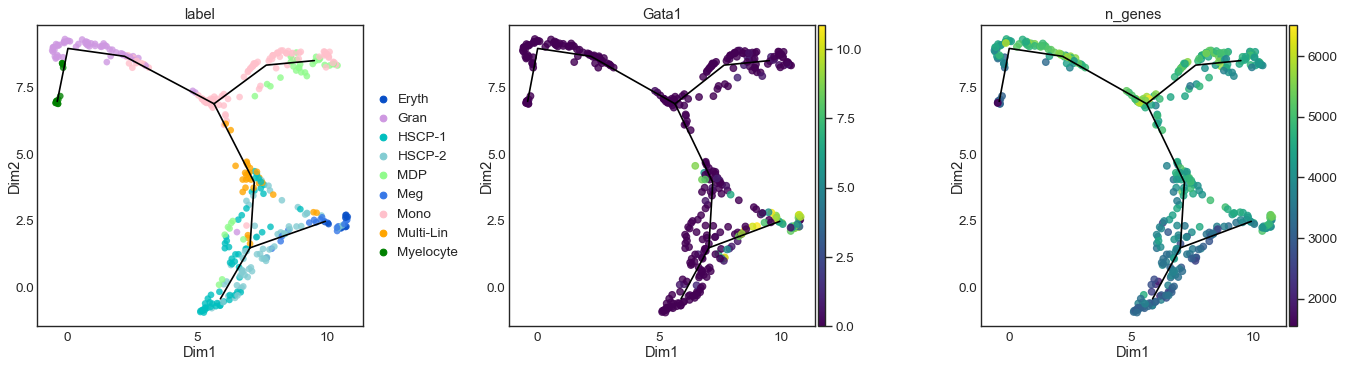

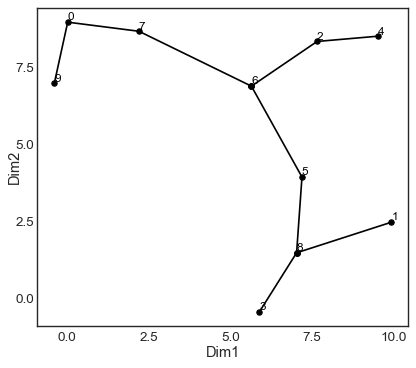

In [12]:
st.seed_elastic_principal_graph(adata,n_clusters=10,use_vis=True)
st.plot_dimension_reduction(adata,color=['label','Gata1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

**`epg_alpha`, `epg_mu`, `epg_lambda` are the three most influential parameters for learning elastic principal graph.**  
- `epg_alpha`: penalizes spurious branching events. **The larger, the fewer branches the function will learn**. (by default, `epg_alpha=0.02`)
- `epg_mu`: penalizes the deviation from harmonic embedding, where harmonicity assumes that each node is the mean of its neighbor nodes. **The larger, the more edges the function will use to fit into points(cells)** (by default, `epg_mu=0.1`) 
- `epg_lambda`: penalizes the total length of edges. **The larger, the 'shorter' curves the function will use to fit into points(cells)** and the fewer points(cells) the curves will reach. (by default, `epg_lambda=0.02`)

> **'epg_trimmingradius'** can help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.elastic_principal_graph(adata,epg_trimmingradius=0.1)`  

In [13]:
st.elastic_principal_graph(adata,epg_alpha=0.02,epg_mu=0.05,epg_lambda=0.05)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 382 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2||50
	
0.7301
	
50
	
49
	
44
	
2
	
0
	
0
	
0.2168
	
0.2052
	
0.9901
	
0.9906
	
0.4963
	
0.01699
	
0.8493
	
42.47
	
0


7.217 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 5


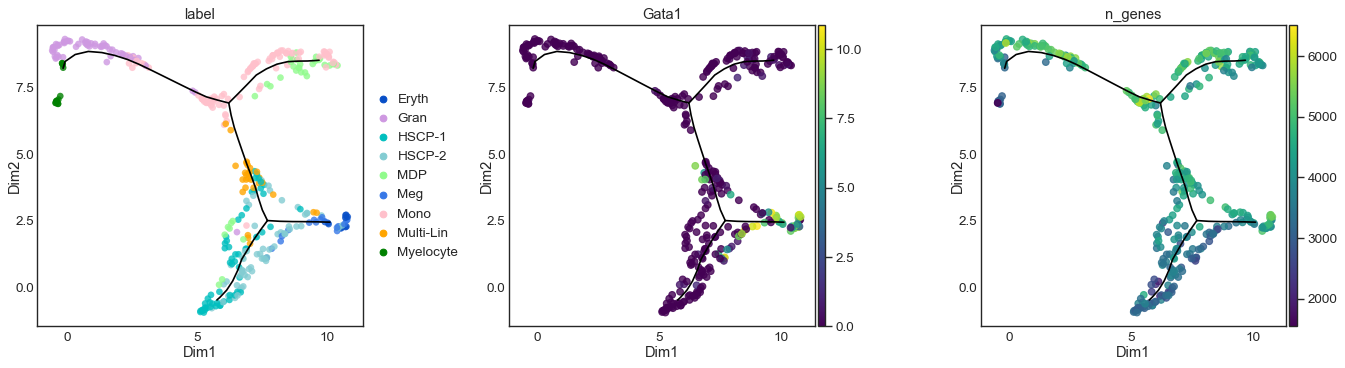

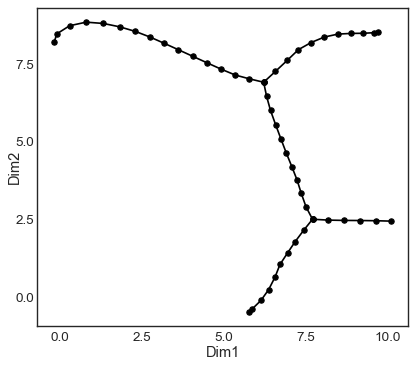

In [14]:
st.plot_dimension_reduction(adata,color=['label','Gata1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)

Shifting branching point to denser area ...
[1]
 "Moving the branching point at node 2"


[1]
 "Moving the branching point at node 6"


[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 44 nodes on 382 points and 2 dimensions"


[1]
 "Using a single core"


0.007 sec elapsed

Number of branches after shifting branching: 5


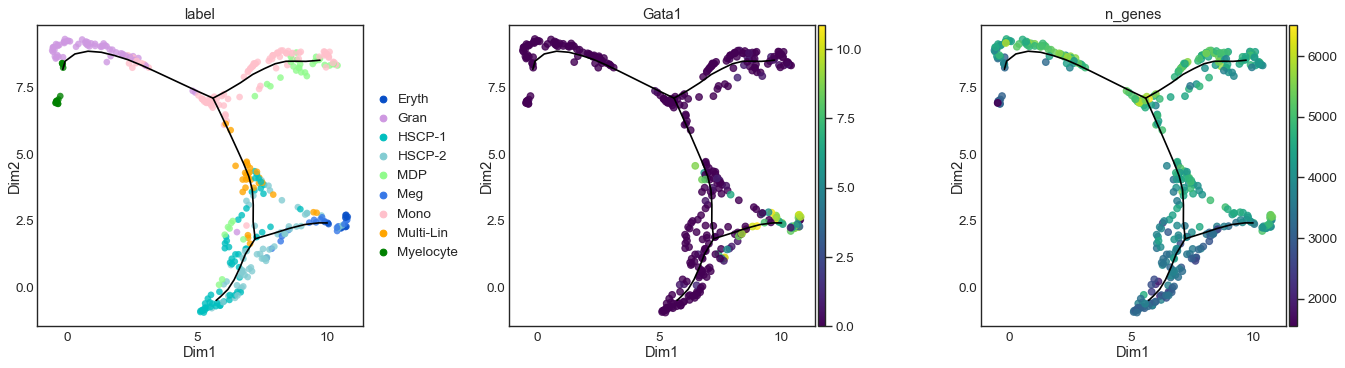

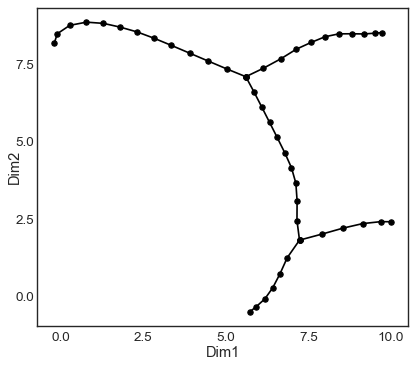

In [15]:
st.shift_branching(adata,epg_shift_mode='NodeDensity',epg_shift_radius=0.1,epg_shift_max=3)
st.plot_dimension_reduction(adata,color=['label','Gata1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 5


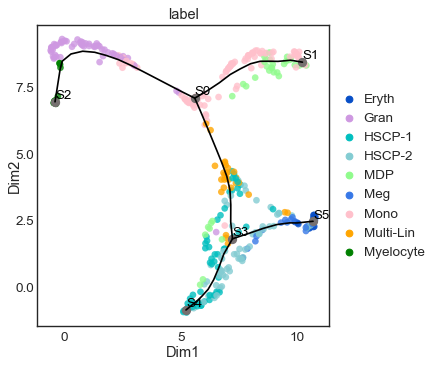

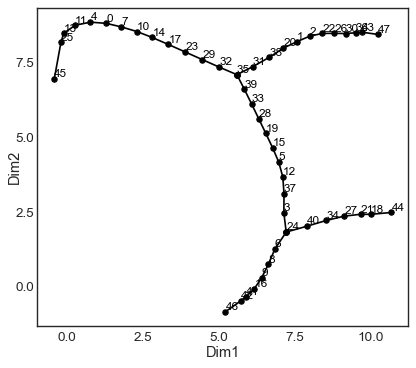

In [16]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['label'],n_components=2,show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

Importing precomputed umap visualization ...


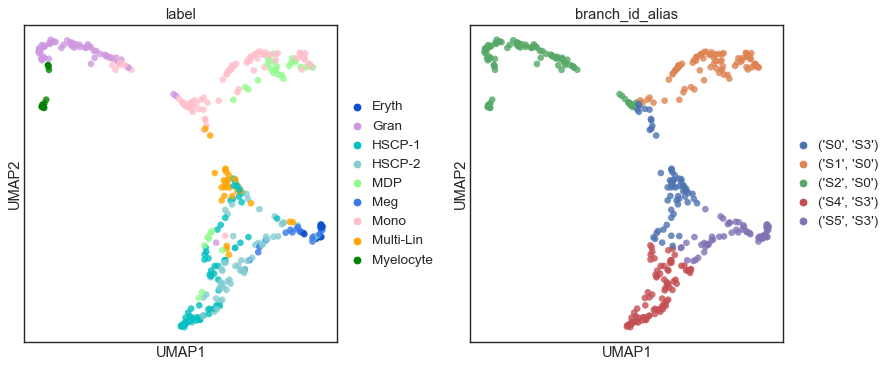

In [17]:
st.plot_visualization_2D(adata,n_neighbors=30,color=['label','branch_id_alias'])

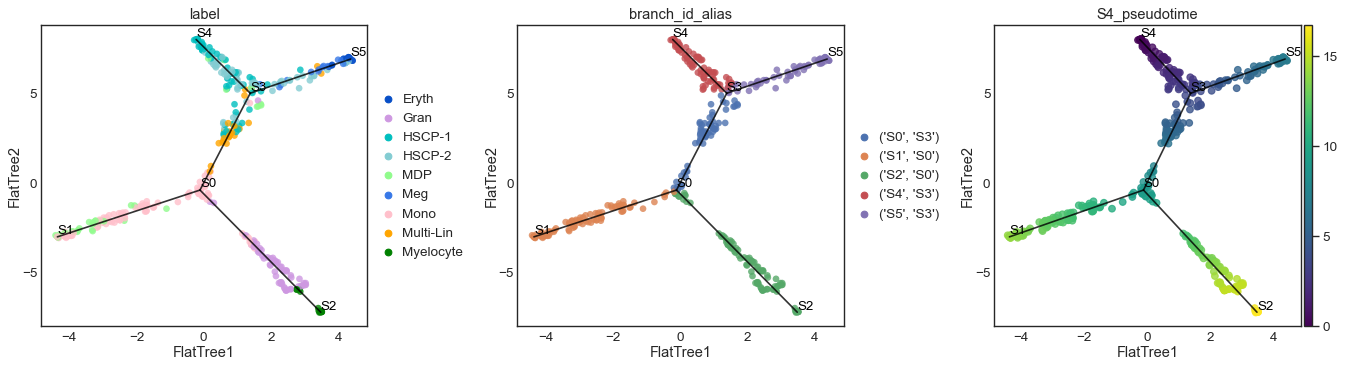

In [18]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S4_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

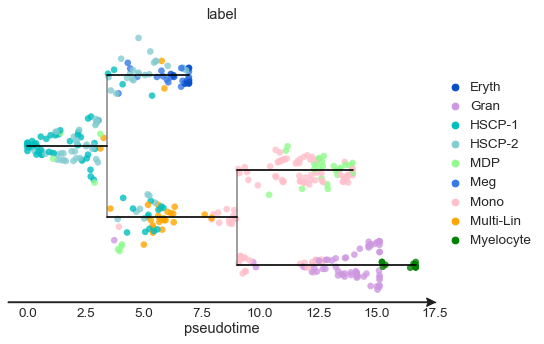

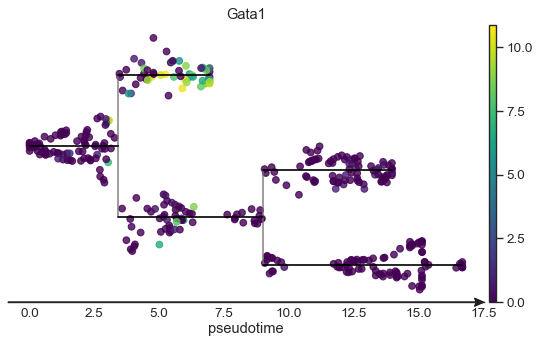

In [19]:
st.plot_stream_sc(adata,root='S4',color=['label','Gata1'],
                  dist_scale=0.5,show_graph=True,show_text=False)

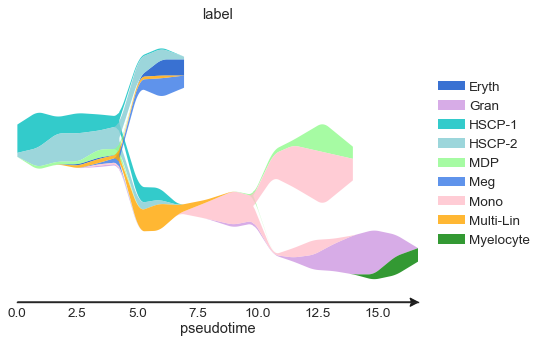

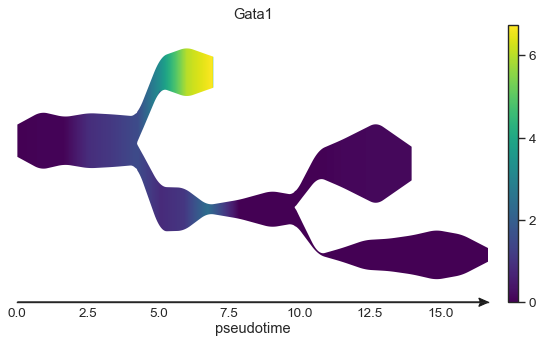

In [20]:
st.plot_stream(adata,root='S4',color=['label','Gata1'])

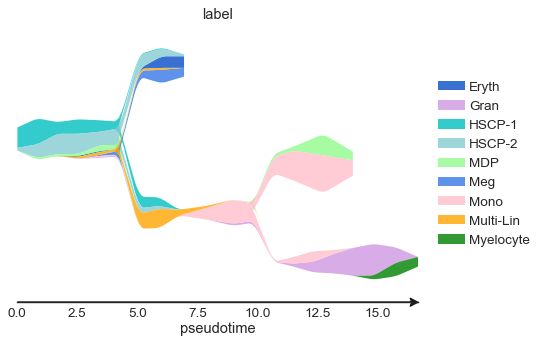

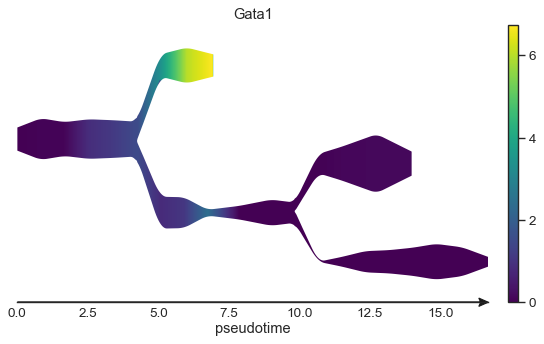

In [21]:
st.plot_stream(adata,root='S4',color=['label','Gata1'],dist_scale=0.6)

## mapping

In [22]:
adata_new=st.read(file_name='./data_perturbation.tsv',workdir='./stream_mapping_result/')
st.add_cell_labels(adata_new,file_name='./cell_perturbation_label.tsv')
st.add_cell_colors(adata_new,file_name='./cell_perturbation_label_color.tsv')

Saving results in: ./stream_mapping_result/


> Here the input datasets have been normalized. So we skipped the normalization step. For new datasets with raw counts, please exectute:
```python
st.normalize(adata_new,method='lib_size')
st.log_transform(adata_new)
st.remove_mt_genes(adata_new)
```

In [23]:
adata_new

AnnData object with n_obs × n_vars = 188 × 23955
    obs: 'label'
    uns: 'workdir', 'label_color'

In [24]:
adata_combined = st.map_new_data(adata,adata_new)

Top variable genes are being used for mapping ...
method 'mlle' is being used for mapping ...
Visualizing new cells on 2D plane ...
Using the manifold from `plot_visualization_2D()` 


In [25]:
adata_combined.obs.head()

,label,node,branch_id,branch_id_alias,branch_lam,branch_dist,S0_pseudotime,S5_pseudotime,S2_pseudotime,S4_pseudotime,S1_pseudotime,S3_pseudotime,batch
Lsk.3-ref,HSCP-1,16,"(46, 24)","(S4, S3)",1.409787,0.471586,7.588585,5.533692,15.282413,1.409787,12.567314,1.990208,ref
Lsk.80-ref,HSCP-1,46,"(46, 24)","(S4, S3)",0.060020,0.034544,8.938352,6.883459,16.632180,0.060020,13.917081,3.339975,ref
Lsk.81-ref,HSCP-1,42,"(46, 24)","(S4, S3)",0.478269,0.170355,8.520102,6.465209,16.213931,0.478269,13.498832,2.921726,ref
Lsk.65-ref,HSCP-1,46,"(46, 24)","(S4, S3)",0.000000,0.135069,8.998371,6.943479,16.692200,0.000000,13.977101,3.399995,ref
Lsk.16-ref,HSCP-1,42,"(46, 24)","(S4, S3)",0.423643,0.014282,8.574728,6.519835,16.268557,0.423643,13.553457,2.976351,ref


In [26]:
### add new labels to highlight the new data
adata_combined.obs['label_new'] = ''
adata_combined.obs.loc[adata.obs_names+'-ref','label_new'] = 'ref'
adata_combined.obs.loc[adata_new.obs_names+'-new','label_new'] = adata_combined.obs.loc[adata_new.obs_names+'-new','label']
adata_combined.uns['label_new_color'] = {'ref':'gray',**adata_new.uns['label_color']}

In [27]:
adata_combined

AnnData object with n_obs × n_vars = 570 × 12445
    obs: 'label', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S5_pseudotime', 'S2_pseudotime', 'S4_pseudotime', 'S1_pseudotime', 'S3_pseudotime', 'batch', 'label_new'
    uns: 'workdir', 'epg', 'flat_tree', 'label_color', 'var_genes', 'vis_trans_umap', 'label_new_color'
    obsm: 'var_genes', 'X_dr', 'X_vis_umap'

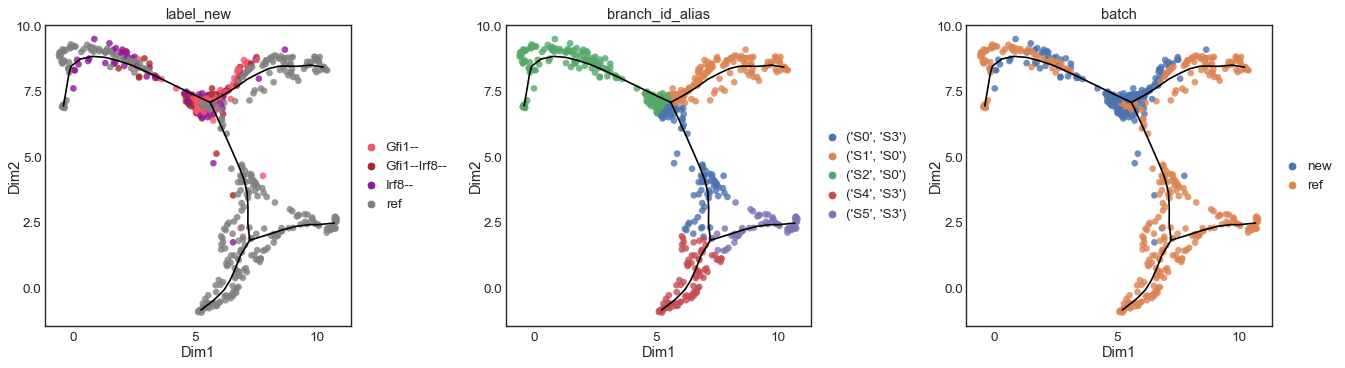

In [28]:
## since we learnt graph on visualization manifold, the dimension reduction plot will be the same as the visualization plot
st.plot_dimension_reduction(adata_combined,color=['label_new','branch_id_alias','batch'],show_graph=True,show_text=False)

Importing precomputed umap visualization ...


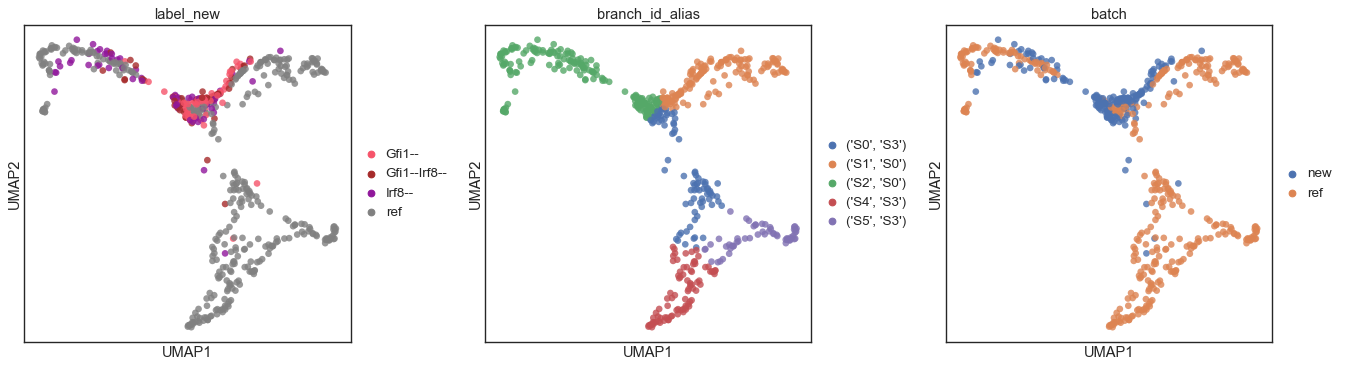

In [29]:
st.plot_visualization_2D(adata_combined,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

Importing precomputed umap visualization ...


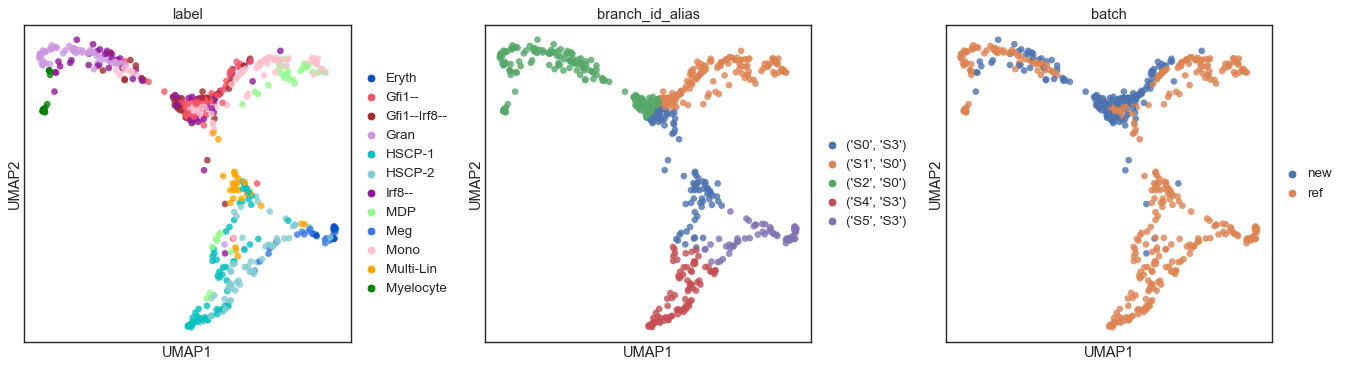

In [30]:
st.plot_visualization_2D(adata_combined,n_neighbors=30,color=['label','branch_id_alias','batch'],fig_ncol=4)

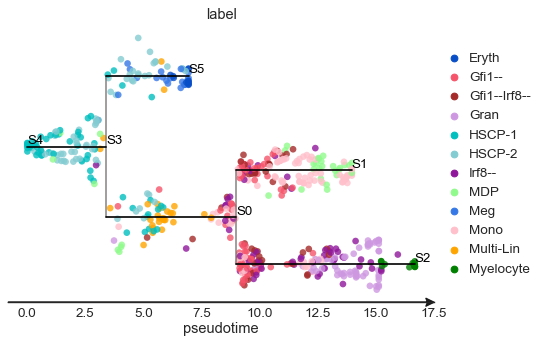

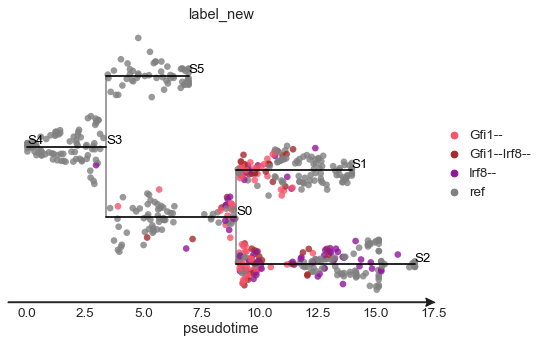

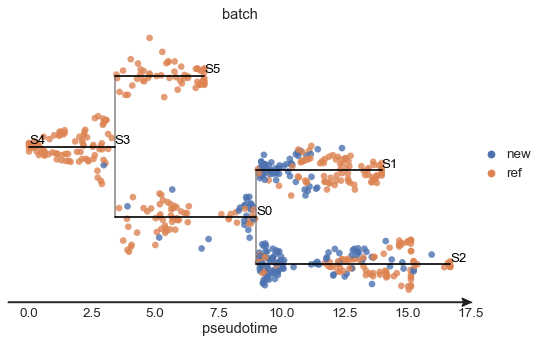

In [31]:
st.plot_stream_sc(adata_combined,root='S4',color=['label','label_new','batch'],
                  dist_scale=0.5,show_graph=True,show_text=True)

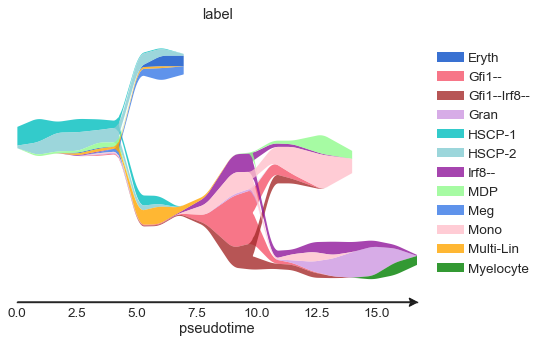

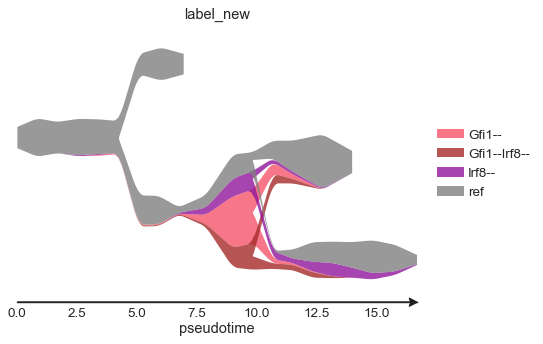

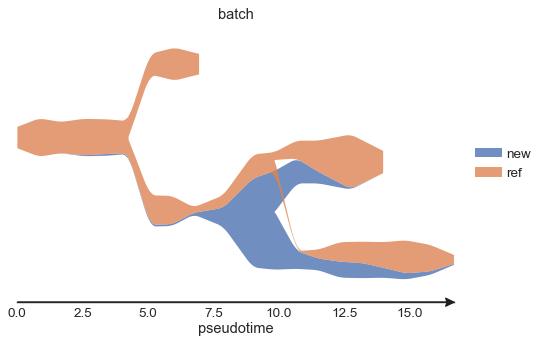

In [32]:
st.plot_stream(adata_combined,root='S4',color=['label','label_new','batch'],dist_scale=1.2)

#### Visualize each perturbation dataset independently

In [33]:
import numpy as np

In [34]:
adata_combined_Gfi1_Null = adata_combined[np.isin(adata_combined.obs.label_new,['Gfi1--','ref'])].copy()

Importing precomputed umap visualization ...


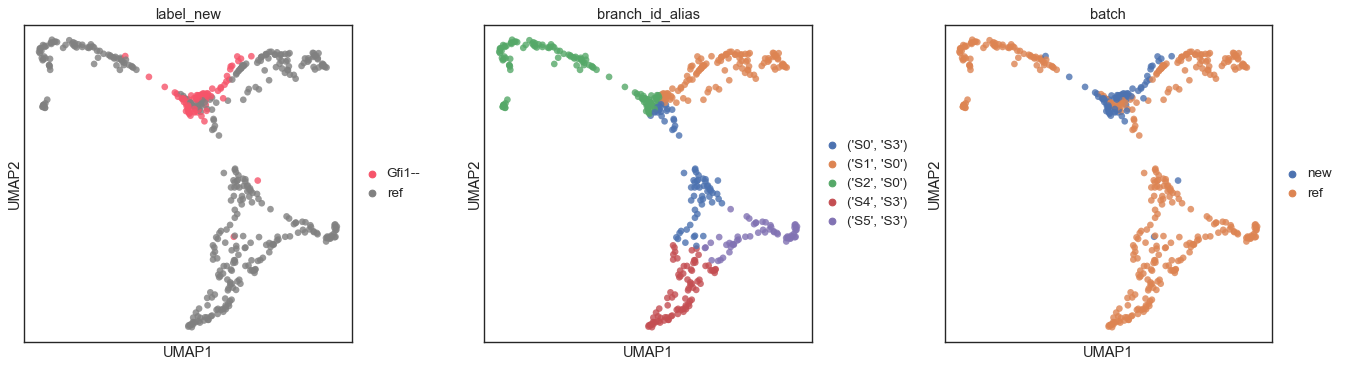

In [35]:
st.plot_visualization_2D(adata_combined_Gfi1_Null,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

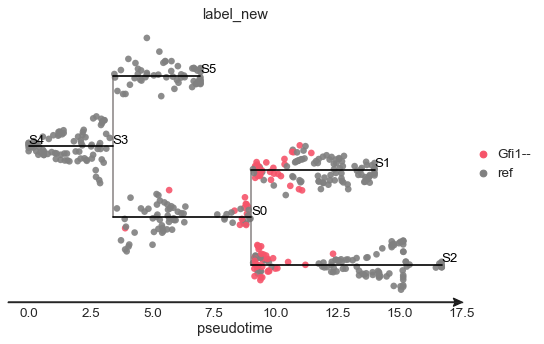

In [36]:
st.plot_stream_sc(adata_combined_Gfi1_Null,root='S4',color=['label_new'],
                  dist_scale=0.5,show_graph=True,show_text=True,alpha=0.9)

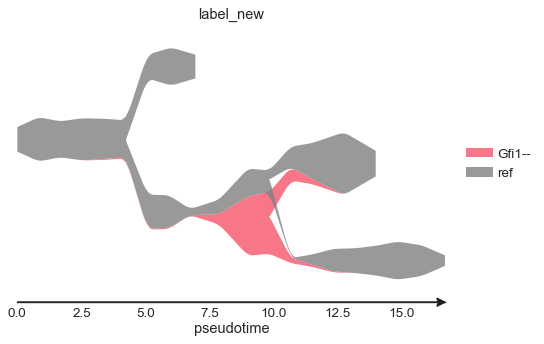

In [37]:
st.plot_stream(adata_combined_Gfi1_Null,root='S4',color=['label_new'])

In [38]:
adata_combined_Irf8_Null = adata_combined[np.isin(adata_combined.obs.label_new,['Irf8--','ref'])].copy()

Importing precomputed umap visualization ...


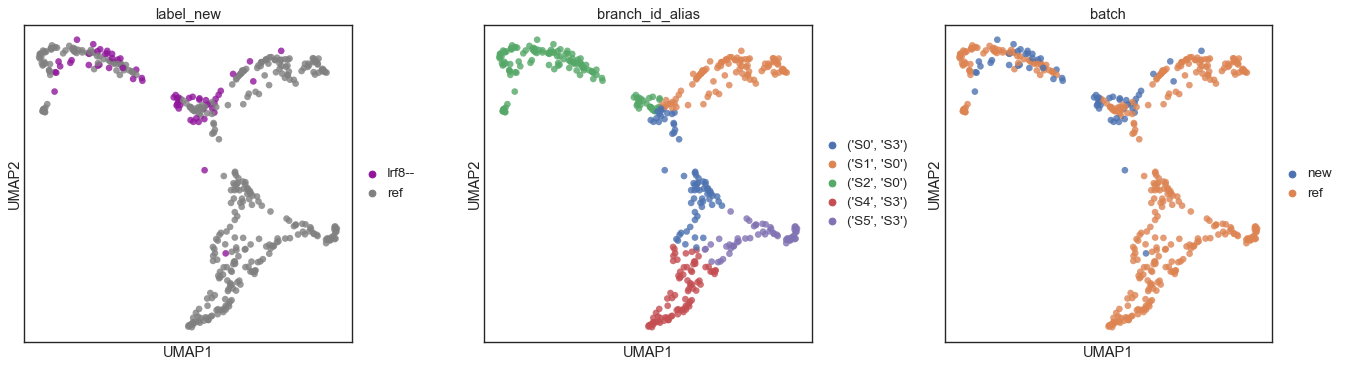

In [39]:
st.plot_visualization_2D(adata_combined_Irf8_Null,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

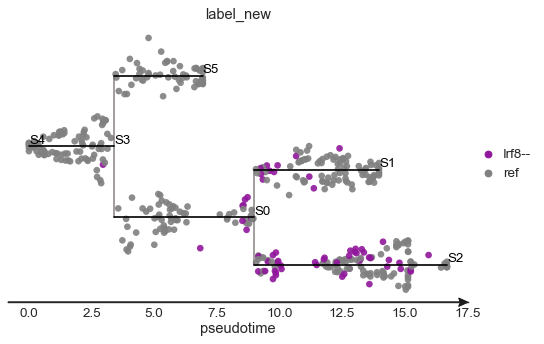

In [40]:
st.plot_stream_sc(adata_combined_Irf8_Null,root='S4',color=['label_new'],
                  dist_scale=0.5,show_graph=True,show_text=True,alpha=0.9)

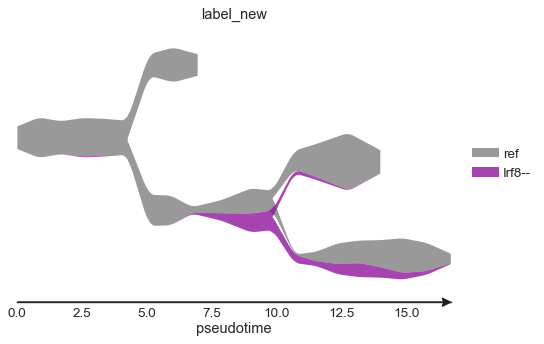

In [41]:
st.plot_stream(adata_combined_Irf8_Null,root='S4',color=['label_new'],dist_scale=0.6,
               fig_legend_order={'label_new':['ref','Irf8--',]})

In [42]:
adata_combined_Gfi1_Irf8_Null = adata_combined[np.isin(adata_combined.obs.label_new,['Gfi1--Irf8--','ref'])].copy()

Importing precomputed umap visualization ...


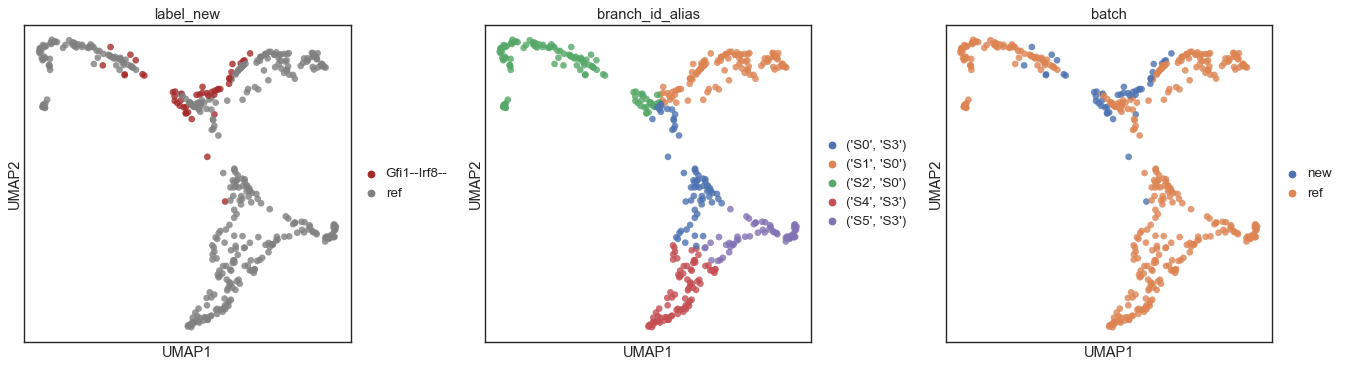

In [43]:
st.plot_visualization_2D(adata_combined_Gfi1_Irf8_Null,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

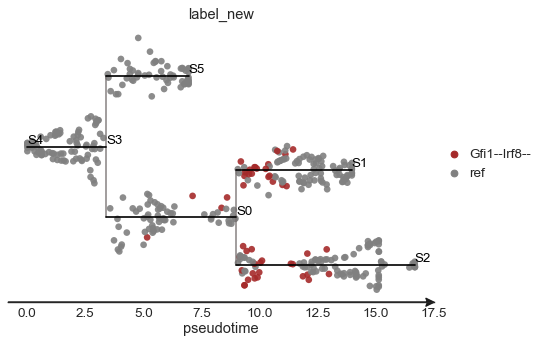

In [44]:
st.plot_stream_sc(adata_combined_Gfi1_Irf8_Null,root='S4',color=['label_new'],
                  dist_scale=0.5,show_graph=True,show_text=True,alpha=0.9)

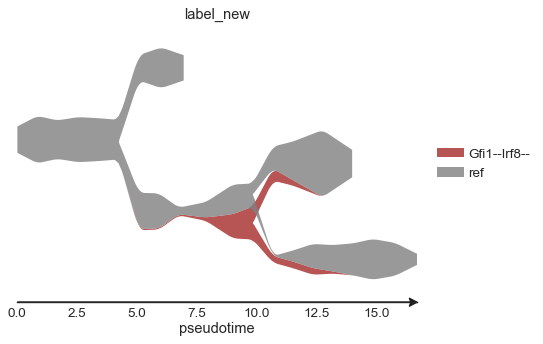

In [45]:
st.plot_stream(adata_combined_Gfi1_Irf8_Null,root='S4',color=['label_new'],dist_scale=0.7)

In [46]:
st.write(adata,file_name='adata.pkl')
st.write(adata_new,file_name='adata_new.pkl')
st.write(adata_combined,file_name='adata_combined.pkl')